In [15]:
import pandas as pd
import numpy as np

In [16]:
# qs=pd.read_csv(
#     "Review topics for 23 Feb. Survey Student Analysis Report.csv" ,
#     usecols=['692022: If you have topics that you would like me to cover on the 23rd of Feb. please submit them here.']
#     )
# qs.rename(
#     columns={'692022: If you have topics that you would like me to cover on the 23rd of Feb. please submit them here.':'Questions'},inplace=True)
# qs.columns
# qs.to_csv('questions')

In [19]:
questions=pd.read_csv('questions').dropna()
questions

,Unnamed: 0,Questions
1,1,More about the difference between marginal cos...
2,2,Cost in a Multiproduct Firm - is it possible t...
3,3,Questions:\n\n1. Would a cheat-sheet be allowe...
4,4,Lecture 4
5,5,I want to ask what is the syllabus of the Midt...
6,6,Cost estimation\n\nConstraints and linear prog...
7,7,MC of separate products in multi-product produ...
8,8,Please cover shadow price and the difference b...


In [46]:
print(questions.Questions )

1    More about the difference between marginal cos...
2    Cost in a Multiproduct Firm - is it possible t...
3    Questions:\n\n1. Would a cheat-sheet be allowe...
4                                            Lecture 4
5    I want to ask what is the syllabus of the Midt...
6    Cost estimation\n\nConstraints and linear prog...
7    MC of separate products in multi-product produ...
8    Please cover shadow price and the difference b...
Name: Questions, dtype: object


Lecture 6: Review

Housekeeping items:
1. To reduce stress homework will now be completion only (now you get 10/10 for effort rather than ~9/10).
2. <=1 assignments per week.
3. cases are now just reading assignments that I will post a few days in advance, and you will report whether or not you read them on canvas.
4. Excel __or__ Python is essential to the course. If you are comfortable with one, try the other. Use this course to develop your abilities. 
5. I am passionate about this aspect of the course, but this is also the direction that the accounting profession is moving. The approach I am taking with this course is implementing the direction of the HKUST SBM Accounting Advisory Board.

> "Finally, I would like to note that the increased emphasis of data analytics in our UG program reflects the feedback from our accounting advisory board members -- the accounting education should go beyond training our students to take CPA exams and incorporate more data analytics and soft skill training.  As our board members are leaders of major current and potential employers of our graduates, the department has been working hard to design our course offering to meet the changing business needs. I believe that it will do students a disservice to offer advanced managerial accounting in an “old way” without excel or Python."

> "More about the difference between marginal cost and incremental cost, and how the questions in exam will be asked and how we answer it. If there is some examples to show us that will be better"

- The __incremental cost__ is the change in cost due to changing output by a specific increment, most often one unit. This is often calculated as the difference in costs before and after the change, and is the slope of the line through those two points on the cost curve.
- The __marginal cost__ is the rate of change of cost at a particular point. This is the slope of the line tangent to the cost curve at the point you are making the calculation.

- _These terms are often equivalent (e.g. when the cost curve is linear),_
- _and the terms are often used interchangeably._ 
- _You should clarify in cases where the difference matters (i.e. if the two are meaningfully different)._

### The exam question on this topic will be a slightly modified version of P1.1. In all other cases I will specify.


> Please cover shadow price and the difference between marginal cost and incremental cost

- the __shadow price__ is the benefit of relaxing the constraint, when we are maximizing profit this is the increase in profit from relaxing the constraint

Since this is a general question, let's just take a look at the slides and excel example.

> "Will there be any sample questions or practice questions for us to do before the midterm or final exam?"

The exam questions will be simplified versions of the homework problems and case questions. So those should be your focus for review.

> Cost in a Multiproduct Firm - is it possible to use excel and go through the assignments once?

Absolutely!

> Would a cheat-sheet be allowed in the exam (both midterm and final)?

No, the exam is closed book. My focus is set-up and interpretation and I have found that allowing cheatsheets leads students to regurgitate formulas rather than answer the questions that I am actually asking.

> Lecture 5 - you mentioned near the end of the class you do not recommend rounding up values if the solver / python results generate multiple decimal places as it may go over your constraints. In the Ava catering case, I tried to round down one variable and round up one and achieved higher profit without violating constraints. Is there a way to express the best integer pair in python or excel that can help fulfill all constraints thank you :)

This is exactly the correct way to think about this problem, and for the exam you will not need to worry about this. 

I would do this by hand in excel, and in python I would write a function that tests the options against both constraints and picks the larger of the two.

With high production volumes this won't matter, but in the Ava example this does matter.

In [25]:
from gekko import GEKKO
m=GEKKO(remote=False)
# 1 choices
x=m.Var(name="banquets",lb=0)
x.value=1
y=m.Var(name="receptions",lb=0)
y.value=1
# 2 objective
m.Maximize(800*x+525*y)
def profit(x,y):
    return 800*x+525*y
# 3 constraints
m.Equation(12*x+4*y<35) # prep time constraint
m.Equation(9*x+6*y<40) # roofing constraint
# 4 solve
m.solve(disp=False) 

In [26]:
pi_1=profit(x.value[0],y.value[0])
print("x:      ", int(x.value[0]))
print("y:      ", int(y.value[0]))
print("Profit: ",int(pi_1))

x:       1
y:       4
Profit:  3517


In [27]:
pi_1=profit(x.value[0],y.value[0])
print("x:      ", x.value[0])
print("y:      ", y.value[0])
print("Profit: ",pi_1)

x:       1.3888888889
y:       4.5833333333
Profit:  3517.3611111025


In [32]:
def check_const_pick_best(x,y):
    '''x,y are non-integer optimal choices'''
    x=int(x)
    y=int(y)
    # check if round x up is allowed
    if (12*(x+1)+4*y<35) and (9*(x+1)+6*y<40):
        profitx=800*(x+1)+525*y
    else:
        profitx=None
    # check if round y up is allowed
    if (12*(x)+4*(y+1)<35) and (9*(x)+6*(1+y)<40):
        profity=800*(x)+525*(y+1)
    else:
        profity=None
        
    if profitx is None and profity is None: 
        opt_x=x
        opt_y=y
    if profitx is not None and profity is None: 
        opt_x=x+1
        opt_y=y
    if profitx is None and profity is not None: 
        opt_x=x
        opt_y=y + 1
   
    if profitx is not None and profity is not None:
        if profitx<profity:
            opt_y=y+1
            opt_x=x
        if profitx>profity:
            opt_y=y
            opt_x=x+1
    print("Optimal x ",opt_x)
    print("Optimal y ",opt_y)

In [38]:
check_const_pick_best(x.value[0],y.value[0])
print(profit(1,4))
print(profit(1,4.5))
print(profit(1.4,4.58))
print(profit(1,5))

Optimal x  1
Optimal y  5
2900
3162.5
3524.5
3425


> I want to ask what is the syllabus of the Midterm, from your website, it seems that we should be finished Ch.1 to Ch. 5 in the Zimmerman textbook. But so far we only covered about part of the Ch.1 and Ch. 2. Also, do you have recommendations about how to prepare for the Midterm? Like doing the exercise questions in the textbook, do you mind to provide the textbook answer to us?

As I mentioned above: The exam questions will be simplified versions of the homework problems and case questions. So those should be your focus for review.

The slides and posted examples will be the full set of solutions that you need for the exam.

The textbook readings are posted in the course schedule (lets look at them now).

> Cost estimation

> Constraints and linear programming

> In my opinion, you have already illustrated the concepts very well.  I am interested in how this will be tested.

The exam questions will be simplified versions of the homework problems and case questions.

For these two items the focus will be on the set up and interpretation steps.

There were a lot of questions about P5.5.

> For question 5 in P5, is marginal cost of the first product is still kept at 30? 

30 is the unit cost of x. When we consider the amounts of x and y independently this amount (30) is the marginal cost of x.

> Because 6 is the cost of y from the unit change of x, is the total marginal cost 36 (including x and y)?

I think you are on the right track here, but I would put this slightly differently. When we frame the choice of y as dependent on the choice of  x, then the resources we sacrifice to produce the marginal unit of x (the marginal cost of x) must include the effect of our choice of x on total profit through the impact of the choice of x on y. 

Put differently, when we produce x we sacrifice 30x directly  and 6x of profit (which is a resource) we would have earned  had our choice of x not effected our choice of y.

> For question 6 in P5, does it mean the cost of the product depends on the decision frame because two products can be no longer two independent choices?

Yes, this is exactly right. If we frame the choices as independent, we get one answer (30) if we frame them as related, we get a different answer (36).


> "Lecture 4"

> "MC of separate products in multi-product production firm ( the one covered in lecture 4)"

> "I would like to ask for further explanation regarding the two implication of marginal cost you mentioned today. In the lesson, you have mentioned that the marginal cost's change is related to the capital change and labor change. Also, the number of labor and capital will affect the effeciency of production. However, I am not very clear about their relationship with the marginal cost's change and how it could affect the production efficiency. It would be appreciated if the above concept could be clarified for better learning process."

Recall that $q_1=\sqrt(KL_1)$ this means that the amount of $q$ you get from each additional unit of labor increases with K, but at a decreasing rate (this is because of the square root). 

Looking at the graphs here will help:

In [47]:
# quick set up for our plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# create the framework for our plot
l1 = np.linspace(0, 300, 300)
k = np.linspace(0, 200, 300)
L1, K = np.meshgrid(l1, k)

# CALCULATE THE PRODUCTION FUNCTION 
Q1 = np.sqrt(L1*K)

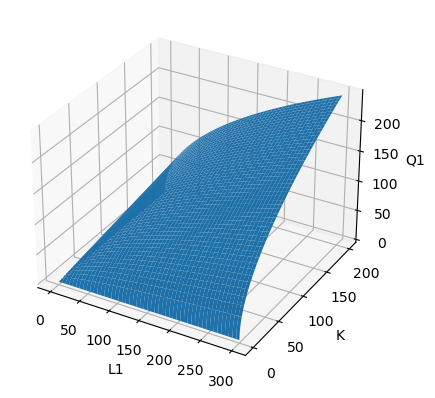

In [48]:
# Create the figure and add a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the data
ax.plot_surface(L1, K, Q1)
# Set axis labels and show the plot
ax.set_xlabel('L1')
ax.set_ylabel('K')
ax.set_zlabel('Q1')
plt.show()

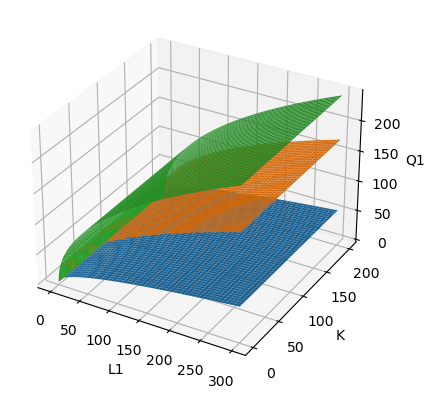

In [50]:
Q1_10 = np.sqrt(L1*10)
Q1_100 = np.sqrt(L1*100)
Q1_200 = np.sqrt(L1*200)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(L1, K, Q1_10)
ax.plot_surface(L1, K, Q1_100)
ax.plot_surface(L1, K, Q1_200)
ax.set_xlabel('L1')
ax.set_ylabel('K')
ax.set_zlabel('Q1')
plt.show()

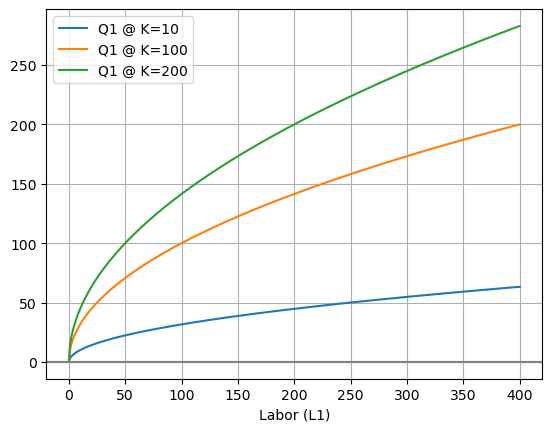

In [52]:
L1=np.linspace(0,400,400)
Q1_10 = np.sqrt(L1*10)
Q1_100 = np.sqrt(L1*100)
Q1_200 = np.sqrt(L1*200)
plt.plot(L1,Q1_10,label='Q1 @ K=10')
plt.plot(L1,Q1_100,label='Q1 @ K=100')
plt.plot(L1,Q1_200,label='Q1 @ K=200')
plt.xlabel('Labor (L1)')
plt.legend()
plt.grid()
plt.axhline(0, color='grey')

In [55]:
k=10
l1=10 
print(np.sqrt(k*l1))
print(np.sqrt((k+1)*l1)," increment k")
print(np.sqrt(k*(l1+1))," increment l1")

10.0
10.488088481701515  increment k
10.488088481701515  increment l1
